In [1]:
import numpy as np

In [2]:
print("Loading data...")
x_train = np.loadtxt('x_train_preprocessed.csv', delimiter=',')
y_train = np.loadtxt('y_train_preprocessed.csv', delimiter=',')
x_test_final = np.loadtxt('x_test_preprocessed.csv', delimiter=',')

Loading data...


1.0

Loading data...
Loading best parameters...
Data loaded.
Training Least Squares... 
Training SGD... 


/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:75: RuntimeWarning: invalid value encountered in divide
  return -(tx.T@(weights*e))/np.sum(weights)


Training Lasso... 


/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:297: RuntimeWarning: divide by zero encountered in scalar divide
  w0 = 1/np.sum(y == 0)
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:299: RuntimeWarning: invalid value encountered in multiply
  ce = -np.mean(w1 * y * np.log(p + 1e-15) + w0 * (1 - y) * np.log(1 - p + 1e-15))


Training Ridge... 


/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:209: RuntimeWarning: divide by zero encountered in scalar divide
  w0 = tx.shape[0]/(2*np.sum(y == 0))
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:212: RuntimeWarning: invalid value encountered in multiply
  A = tx.T @ (weights[:, np.newaxis] * tx) + (N * lambda_) * np.eye(D)
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:212: RuntimeWarning: invalid value encountered in matmul
  A = tx.T @ (weights[:, np.newaxis] * tx) + (N * lambda_) * np.eye(D)
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:213: RuntimeWarning: in

Training Logistic Regression... 


/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:235: RuntimeWarning: divide by zero encountered in scalar divide
  w0 = N / (2 * np.sum(y == 0))
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:237: RuntimeWarning: invalid value encountered in matmul
  grad = (tx.T @ (weights * (prediction - y))) / N
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:226: RuntimeWarning: divide by zero encountered in scalar divide
  w0 = tx.shape[0]/(2*np.sum(y == 0))
/Users/christophersoriano/Library/Mobile Documents/com~apple~CloudDocs/Mac/Epfl/Master/MA3/Machine Learning/ML_project1/project1/implemented_functions.py:228: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean

threshold1 


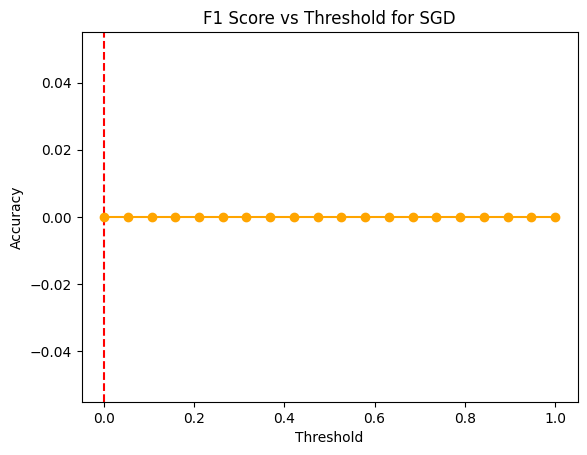

The best threshold is: 0
threshold2 


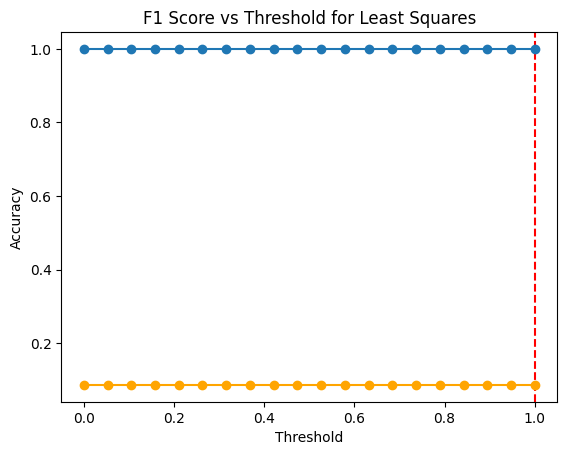

The best threshold is: 1.0
threshold3 


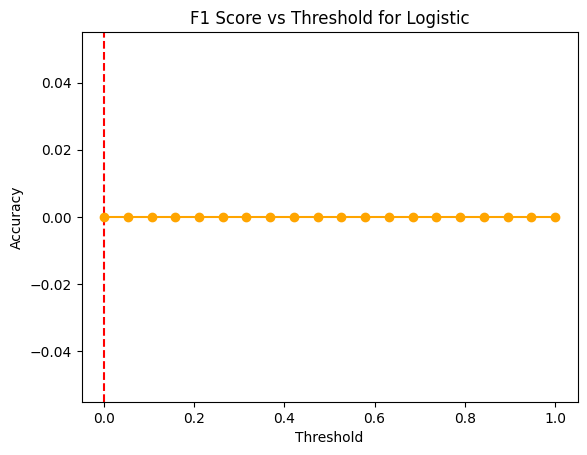

The best threshold is: 0
threshold5 


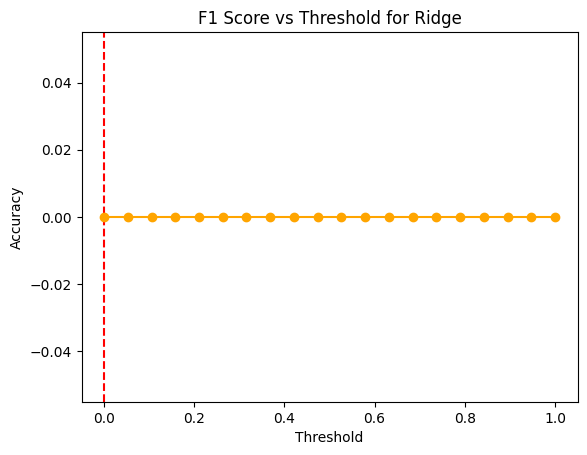

The best threshold is: 0
threshold6 


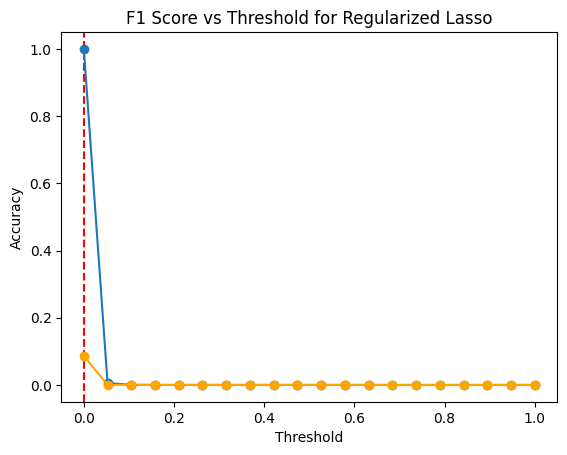

The best threshold is: 0.0
Accuracy of SGD is 0.0%
F1 score SGD is nan
Accuracy of Least Squares is 8.62907035214165%
F1 score Least Squares is 1.0
Accuracy of Ridge is 0.0%
F1 score Ridge is nan
Accuracy of Logistic is 0.0%
F1 score Logistic is nan
F1 score Regularized Logistic is nan
Accuracy of Regularized Lasso is 8.62907035214165%
F1 score Regularized Lasso is 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
import data_preprocessing
import importlib
importlib.reload(data_preprocessing)
import cross_validation
#import TEST
#importlib.reload(TEST)
importlib.reload(cross_validation)
import implemented_functions
importlib.reload(implemented_functions)
import PCA
importlib.reload(PCA)
import pandas as pd 
import os

def test_thresholds(x_test, y_test, weights, method):
    f1_scores = []
    accuracies = []
    best_threshold = 0
    best_weighted_f1 = 0
    for threshold in np.linspace(0, 1, 20):
        accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_test, weights, method, threshold, detailed=False)
        f1_score = implemented_functions.compute_f1_score(y_test, y_pred)
        f1_scores.append(f1_score)
        if 5*f1_score + accuracy >= best_weighted_f1:
            best_weighted_f1 = 5*f1_score + accuracy
            best_threshold = threshold
        accuracies.append(accuracy)
        #print(f"-----{method}: F1 score {method} at threshold {threshold} is {implemented_functions.compute_f1_score(y_test, y_pred)}")
    plt.axvline(x=best_threshold, color='r', linestyle='--')
    plt.plot(np.linspace(0, 1, 20), f1_scores, marker='o')
    plt.title(f'F1 Score vs Threshold for {method}')
    plt.xlabel('Threshold')
    plt.ylabel('F1 Score')
    plt.plot(np.linspace(0, 1, 20), accuracies, marker='o', color='orange')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.show()
    print("The best threshold is:", best_threshold)
    return best_threshold

def load_best_params(file_path):
    data = np.loadtxt(file_path, delimiter=',', dtype=str)
    headers = data[0]
    rows = data[1:]
    
    best_params = [dict(zip(headers, row)) for row in rows]
    return best_params


print("Loading data...")
#x_train = np.loadtxt('x_train_preprocessed.csv', delimiter=',')
#y_train = np.loadtxt('y_train_preprocessed.csv', delimiter=',')
#x_test_final = np.loadtxt('x_test_preprocessed.csv', delimiter=',')

print("Loading best parameters...")
best_params_dict = load_best_params('results_cross_val_without_PCA.csv')

print("Data loaded.")
#x_train, x_test_final, _, _, _, _, _ = PCA.PCA_threshold(x_train, x_test_final, 0.95)
#print(x_train.shape)

x_train,x_test,y_train,y_test = data_preprocessing.split_data(x_train, y_train, 0.8, seed=1)
max_iters = 250

print("Training Least Squares... ")
least_squares_param = next(d for d in best_params_dict if d['method'] == 'least_squares')

x_tr_ls = data_preprocessing.build_poly(x_train,int(least_squares_param['degree']))
x_te_ls = data_preprocessing.build_poly(x_test,int(least_squares_param['degree']))
initial_w = np.zeros(x_tr_ls.shape[1])


w_weighted_least_squares, loss_weighted_ls = implemented_functions.class_weighted_least_squares(y_train, x_tr_ls)


print("Training SGD... ")
sgd_param = next(d for d in best_params_dict if d['method'] == 'mse_sgd')

x_tr_sgd = data_preprocessing.build_poly(x_train,int(sgd_param['degree']))
x_te_sgd = data_preprocessing.build_poly(x_test,int(sgd_param['degree']))
initial_w = np.zeros(x_tr_sgd.shape[1])

w_sgd, loss_sgd = implemented_functions.mean_squared_error_sgd(y_train,  x_tr_sgd, initial_w, max_iters, float(sgd_param['gamma']))

print("Training Lasso... ")
lasso_param = next(d for d in best_params_dict if d['method'] == 'reg_lasso_logistic')

x_tr_lasso = data_preprocessing.build_poly(x_train,int(lasso_param['degree']))
x_te_lasso = data_preprocessing.build_poly(x_test,int(lasso_param['degree']))
initial_w = np.zeros(x_tr_lasso.shape[1])
w_log_lasso, loss_log_lasso = implemented_functions.reg_logistic_lasso_subgradient(y_train, x_tr_lasso, float(lasso_param['lambda']), initial_w, max_iters, float(lasso_param['gamma']))

print("Training Ridge... ")
ridge_param = next(d for d in best_params_dict if d['method'] == 'ridge')

x_tr_ridge = data_preprocessing.build_poly(x_train, int(ridge_param['degree']))
x_te_ridge = data_preprocessing.build_poly(x_test, int(ridge_param['degree']))
initial_w = np.zeros(x_tr_ridge.shape[1])
w_ridge, loss_ridge = implemented_functions.ridge_regression(y_train, x_tr_ridge, float(ridge_param['lambda']))

print("Training Logistic Regression... ")
logistic_param = next(d for d in best_params_dict if d['method'] == 'logistic')

x_tr_log = data_preprocessing.build_poly(x_train, int(logistic_param['degree']))
x_te_log = data_preprocessing.build_poly(x_test, int(logistic_param['degree']))
initial_w = np.zeros(x_tr_log.shape[1])
w_logistic, loss_logistic = implemented_functions.logistic_regression(y_train, x_tr_log, initial_w, max_iters, float(logistic_param['gamma']))


#x_tr_reg_log= data_preprocessing.build_poly(x_train,4)
#x_te_reg_log = data_preprocessing.build_poly(x_test,4)
#initial_w = np.zeros(x_tr_reg_log.shape[1])
#print("training7 ")
#w_reg_logistic, loss_reg_logistic = implemented_functions.reg_logistic_regression(y_train, x_tr_reg_log, 0.001, initial_w, max_iters, 0.1)

print("threshold1 ")
sgd_best_threshold = test_thresholds(x_te_sgd, y_test, w_sgd, "SGD")
print("threshold2 ")
least_squares_best_threshold = test_thresholds(x_te_ls, y_test, w_weighted_least_squares, "Least Squares")
print("threshold3 ")
logistic_best_threshold = test_thresholds(x_te_log, y_test, w_logistic, "Logistic")
#print("threshold4 ")
#logistic_reg_best_threshold = test_thresholds(x_te_reg_log, y_test, w_reg_logistic, "Regularized Logistic")
print("threshold5 ")
ridge_best_threshold = test_thresholds(x_te_ridge, y_test, w_ridge, "Ridge")
print("threshold6 ")
log_lasso_best_threshold = test_thresholds(x_te_lasso, y_test, w_log_lasso, "Regularized Lasso")

accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_sgd, w_sgd, "SGD", sgd_best_threshold)
print(f"F1 score SGD is {implemented_functions.compute_f1_score(y_test, y_pred)}")
accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_ls, w_weighted_least_squares, "Least Squares", least_squares_best_threshold)
print(f"F1 score Least Squares is {implemented_functions.compute_f1_score(y_test, y_pred)}")
accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_ridge, w_ridge, "Ridge", ridge_best_threshold)
print(f"F1 score Ridge is {implemented_functions.compute_f1_score(y_test, y_pred)}")
accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_log, w_logistic, "Logistic", logistic_best_threshold)
print(f"F1 score Logistic is {implemented_functions.compute_f1_score(y_test, y_pred)}")
#accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_reg_log, w_reg_logistic, "Regularized Logistic", logistic_reg_best_threshold)
print(f"F1 score Regularized Logistic is {implemented_functions.compute_f1_score(y_test, y_pred)}")
accuracy, y_pred = implemented_functions.compute_accuracy(y_test, x_te_lasso, w_log_lasso, "Regularized Lasso", log_lasso_best_threshold)
print(f"F1 score Regularized Lasso is {implemented_functions.compute_f1_score(y_test, y_pred)}")


In [28]:
y_pred_test

(0, array([0., 0., 0., ..., 0., 1., 0.]))

In [9]:
# This part of the code can be used to generate predictions for the ai crowd test set once the best model and threshold are selected
print("Generating predictions for test set...")
x_test_poly = data_preprocessing.build_poly(x_test_final, int(least_squares_param['degree']))
acc, y_pred_test = implemented_functions.compute_accuracy(None, x_test_poly, w_weighted_least_squares, "Least Squares", least_squares_best_threshold, mode = 'submission')

ids = [i for i in range(328135, 437513+1)]
create_csv_submission(ids, y_pred_test, 'results/submission.csv')


Generating predictions for test set...
